## Dataset exploration

##  We first take a look at the daily OHLC candlestick chart.

In [1]:
# a liitle change with datasetB02, because data in the TstB02_2022-03-01tapes.csv is not complete, 
# so we remove this csv file.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
data = pd.read_pickle('.\Dataset_B02_day_K.pkl') 

In [3]:
data.head()

,Open,High,Low,Close
2022-01-04,253,275,229,241
2022-01-05,251,260,229,246
2022-01-06,242,307,236,283
2022-01-07,286,310,257,263
2022-01-10,262,278,238,242


In [4]:
data.index = pd.to_datetime(data.index)
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()
pdates = mdates.date2num(data.index)

In [5]:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


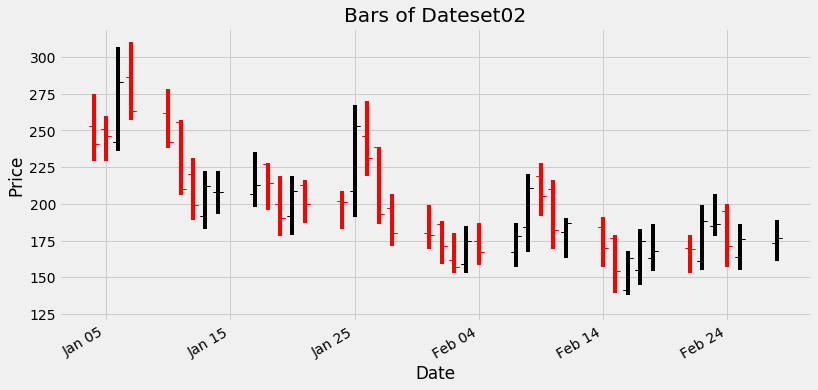

In [6]:
import mpl_finance as mpf # This is the old mpl-finance library - note the '_' in the library name

# We can now feed the ohlc matrix into mpl-finance to create a candle stick chart:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mpf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Bars of Dateset02')
ax.set_ylim(120,320)
# Choosing to display the dates as "Month Day":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# This is to automatically arrange the date labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

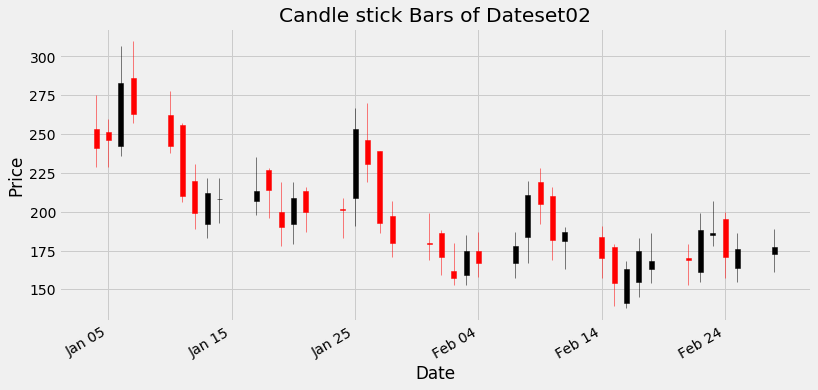

In [7]:
fig, ax = plt.subplots(figsize = (12,6))

mpf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Candle stick Bars of Dateset02')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate()

# plt.show() # add this if you're not using Jupyter Notebook

We can find that the datapoints are too less.So we decide to use price of every ten minutes.

## Then we have a look at the prices every 10 tenmiuts

In [8]:
import pickle
Closeprice_every10m = open('.\Dataset_B02_10mins.pkl', 'rb')

In [9]:
data2 = pickle.load(Closeprice_every10m)

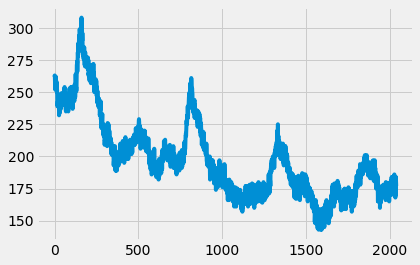

In [10]:
x = [i for i in range(len(data2))]
plt.plot(x, data2)

From the closeprice, it seems there are some regulartity for people to recognize.

In [11]:
data3 = pd.read_pickle('.\Dataset_B02_10mins_OHLCV.pkl') 

In [12]:
data3.head()

,Open,High,Low,Close,Volume
0,253,275,253,262,316346
1,268,272,254,263,310547
2,259,272,252,262,323198
3,262,272,250,256,317700
4,259,271,251,252,318941


In [13]:
dvalues = data3[['Open', 'High', 'Low', 'Close']].values.tolist()

Print the volume of every ten minutes to see if there is some similarity with the plot above.
Here, we don't make the candlestick charts. The reason is that the time interval is ten minutes and the dataindex is not the actual time.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


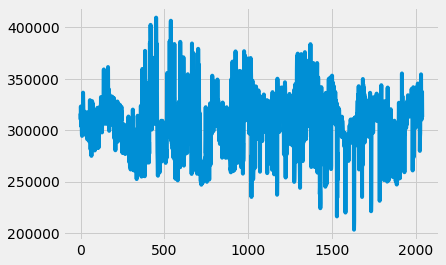

In [16]:
plt.plot(x,data3.Volume)

It seems that the volumes have no obvious connection with the close price.